In [318]:
from numpy.random import exponential, poisson
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import astropy.units as u
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
import numpy as np

In [155]:
frame_time = 1/(10000.) * u.s

In [162]:
frame_time.to('microsecond')

<Quantity 100.0 us>

In [258]:
def f(count_rate):
    dts = exponential(scale=1/np.float(count_rate), size=int(count_rate * 1.1))
    times = np.zeros(dts.shape[0])
    for i, a in enumerate(dts):
        times[i] = np.sum(dts[0:i+1])
    ts = pd.Series(index=pd.to_datetime(times, unit='s'), data=np.ones(times.shape[0]))
    # resample to frames, 100U represents 100 microseconds
    measured_ts = ts.resample('100U', how='sum')
    # inspect only the first second
    return ts['1970-01-01 00:00:00.00':'1970-01-01 00:00:00.000'], measured_ts['1970-01-01 00:00:00.00':'1970-01-01 00:00:00.000']

In [295]:
ts, measured_ts = f(200)

In [297]:
np.sum(measured_ts[measured_ts >= 1])

199.0

In [299]:
min_rate = 1
max_rate = 40000.
step = 1000
count_rates = np.arange(min_rate,max_rate,step)
measured_count_rate = np.zeros(count_rates.shape[0])
percent_pileup = np.zeros((4, count_rates.shape[0]))

for i, count_rate in enumerate(count_rates):
    ts, measured_ts = f(count_rate)
    measured_count_rate[i] = np.sum(measured_ts >= 1)
    if measured_count_rate[i] > 0:
        percent_pileup[0, i] = np.sum(measured_ts >= 2) / np.float(measured_count_rate[i])
        percent_pileup[1, i] = np.sum(measured_ts >= 3) / np.float(measured_count_rate[i])
        percent_pileup[2, i] = np.sum(measured_ts >= 4) / np.float(measured_count_rate[i])
        percent_pileup[3, i] = np.sum(measured_ts >= 5) / np.float(measured_count_rate[i])

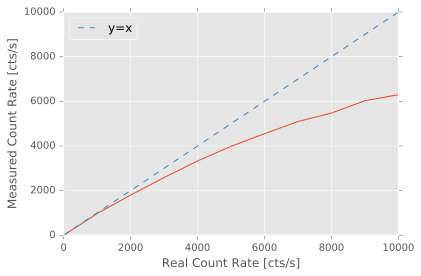

In [319]:
plt.plot(count_rates, measured_count_rate)
plt.plot([min_rate, max_rate], [min_rate, max_rate],'--', label='y=x')
plt.ylim(0, 10000)
plt.xlim(0, 10000)
plt.xlabel('Real Count Rate [cts/s]')
plt.ylabel('Measured Count Rate [cts/s]')
plt.legend(loc=0)

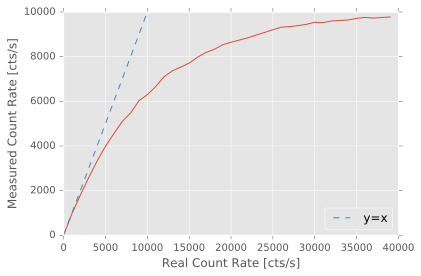

In [320]:
plt.plot(count_rates, measured_count_rate)
plt.plot([min_rate, max_rate], [min_rate, max_rate],'--', label='y=x')
plt.ylim(0, 10000)
plt.xlabel('Real Count Rate [cts/s]')
plt.ylabel('Measured Count Rate [cts/s]')
plt.legend(loc=4)

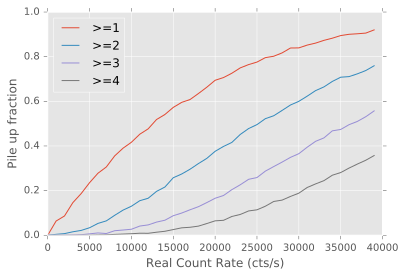

In [321]:
plt.plot(count_rates, percent_pileup[0,:], label='>=1')
plt.plot(count_rates, percent_pileup[1,:], label='>=2')
plt.plot(count_rates, percent_pileup[2,:], label='>=3')
plt.plot(count_rates, percent_pileup[3,:], label='>=4')

plt.xlabel('Real Count Rate (cts/s)')
plt.ylabel('Pile up fraction')
plt.legend(loc=0)

(0, 4000)

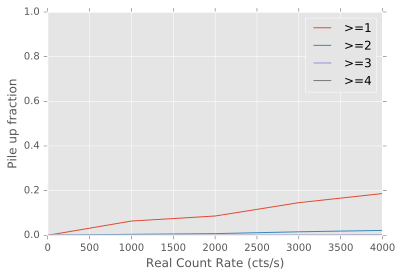

In [323]:
plt.plot(count_rates, percent_pileup[0,:], label='>=1')
plt.plot(count_rates, percent_pileup[1,:], label='>=2')
plt.plot(count_rates, percent_pileup[2,:], label='>=3')
plt.plot(count_rates, percent_pileup[3,:], label='>=4')

plt.xlabel('Real Count Rate (cts/s)')
plt.ylabel('Pile up fraction')
plt.legend(loc=0)
plt.xlim(0, 4000)